In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the training data
df = pd.read_csv("final_merged.csv")

# Display the shape of the dataframe
print("Shape of the training dataset:", df.shape)

# Display the column names of the dataframe
print("\nColumns in the training dataset:\n", list(df.columns))

Shape of the training dataset: (563113, 46)

Columns in the training dataset:
 ['Unnamed: 0', 'STORE_KEY', 'STORE_NUMBER', 'STORE_NAME', 'STORE_TYPE_NAME', 'OPEN_DATE', 'CLOSE_DATE', 'CITY_NAME', 'STATE_CODE', 'STATE_NAME', 'TIME_ZONE_NAME', 'DMA_ID', 'DMA_NAME', 'STORE_STATUS', 'REGION_ID', 'REGION_NAME', 'PRIOR_STORE_NUMBER', 'STORE_LIVE_DATE', 'STORE_FUNCTIONAL_STATUS', 'GLOBAL_REGION_NAME', 'GLOBAL_REGION_STORE_TYPE_NAME', 'AREA_REGION', 'DISPATCH_GO_LIVE_DATE', 'DOOR_DASH_GO_LIVE_DATE', 'DOOR_DASH_MARKUP_GO_LIVE_DATE', 'STORE_CONCEPT_NAME', 'UBER_EATS_MARKUP_DATE', 'BUSINESS_DATE', 'TEMP_CLOSE_INDICATOR', 'PROJECTION_INCLUDED_INDICATOR', 'BUSINESS_DATE_FISCAL_DAY_OF_YEAR', 'BUSINESS_DATE_FISCAL_YEAR', 'COMP_BUSINESS_DATE_FISCAL_YEAR', 'COMPARABLE_INDICATOR', 'TRANSACTION_FINAL_COUNT', 'NET_SALES_FINAL_USD_AMOUNT', 'PY_TRANSACTION_FINAL_COUNT', 'PY_NET_SALES_FINAL_USD_AMOUNT', 'PROMOTION_TYPE', 'PROMOTION_OFFER', 'PROMOTION_ITEM', 'PROMOTION_CASH_AMOUNT', 'PROMOTION_PERCENTAGE', 'P

In [3]:
#find number of unique values in each column
print("\nNumber of unique values in each column:\n", df.nunique())


Number of unique values in each column:
 Unnamed: 0                          563113
STORE_KEY                              419
STORE_NUMBER                           419
STORE_NAME                             419
STORE_TYPE_NAME                          2
OPEN_DATE                              402
CLOSE_DATE                               7
CITY_NAME                              327
STATE_CODE                              38
STATE_NAME                              38
TIME_ZONE_NAME                           7
DMA_ID                                  98
DMA_NAME                                98
STORE_STATUS                             2
REGION_ID                                4
REGION_NAME                              4
PRIOR_STORE_NUMBER                       2
STORE_LIVE_DATE                        402
STORE_FUNCTIONAL_STATUS                  4
GLOBAL_REGION_NAME                       1
GLOBAL_REGION_STORE_TYPE_NAME            2
AREA_REGION                             99
DISPATCH_GO_

In [4]:
#drop columns with only one unique value
df = df.loc[:, df.nunique() > 1]
#drop Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])
#shape of df
print("\nShape of the training dataset after dropping columns with only one unique value:", df.shape)


Shape of the training dataset after dropping columns with only one unique value: (563113, 43)


In [5]:
#find columns with missing values
missing_values = df.isnull().sum()
print("\nColumns with missing values:\n", missing_values[missing_values > 0])



Columns with missing values:
 DISPATCH_GO_LIVE_DATE       4806
DOOR_DASH_GO_LIVE_DATE     16968
PROMOTION_OFFER           430398
PROMOTION_ITEM            430398
PLATFORM                  430398
PROMOTION_COVERAGE        430398
dtype: int64


In [6]:
#sort data based on STORE_ID and DATE
df = df.sort_values(by=['STORE_KEY', 'BUSINESS_DATE'])
df.head(20)

,STORE_KEY,STORE_NUMBER,STORE_NAME,STORE_TYPE_NAME,OPEN_DATE,CLOSE_DATE,CITY_NAME,STATE_CODE,STATE_NAME,TIME_ZONE_NAME,DMA_ID,DMA_NAME,STORE_STATUS,REGION_ID,REGION_NAME,PRIOR_STORE_NUMBER,STORE_LIVE_DATE,STORE_FUNCTIONAL_STATUS,GLOBAL_REGION_STORE_TYPE_NAME,AREA_REGION,DISPATCH_GO_LIVE_DATE,DOOR_DASH_GO_LIVE_DATE,DOOR_DASH_MARKUP_GO_LIVE_DATE,STORE_CONCEPT_NAME,UBER_EATS_MARKUP_DATE,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,COMPARABLE_INDICATOR,TRANSACTION_FINAL_COUNT,NET_SALES_FINAL_USD_AMOUNT,PY_TRANSACTION_FINAL_COUNT,PY_NET_SALES_FINAL_USD_AMOUNT,PROMOTION_TYPE,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,PROMOTION_COVERAGE
498545,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-24,0,0,118,2020,2019,0,168,3414.07,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498218,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-25,0,0,119,2020,2019,0,184,3977.54,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
497764,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-26,0,0,120,2020,2019,0,158,3440.27,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498394,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-27,0,0,121,2020,2019,0,125,2249.63,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498816,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-28,0,0,122,2020,2019,0,110,1998.33,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498411,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-29,0,0,123,2020,2019,0,137,2600.38,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498908,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-04-30,0,0,124,2020,2019,0,144,2827.13,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498155,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-05-01,0,0,125,2020,2019,0,168,3522.21,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498124,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-05-02,0,0,126,2020,2019,0,148,3450.77,0,0.00,No Promotion,NaN,NaN,0,0.00,NaN,NaN
498037,10,1700,CA1700,FRANCHISE,2020-04-24,1999-12-31,HUNTINGTON BEACH,CA,CALIFORNIA,PACIFIC,803.00,LOS ANGELES,ACTIVE,4.00,WEST,0.00,4/24/2020,OPERATIONAL,DOMESTICFRANCHISE,LOS ANGELES,2020-04-24,2020-04-24,9/27/2020,ORIGINAL,7/20/2022,2020-05-03,0,0,127,2020,2019,0,132,2765.55,0,0.00,No Promotion,NaN,N

In [7]:
#find STORE_KEY with most data entries
store_counts = df['STORE_KEY'].value_counts()
print("\nStore with most data entries:\n", store_counts.head(1))


Store with most data entries:
 STORE_KEY
1374    1714
Name: count, dtype: int64



Store information for store 1374:
         STORE_KEY               DMA_ID STATE_NAME
159672       1374               602.00   ILLINOIS


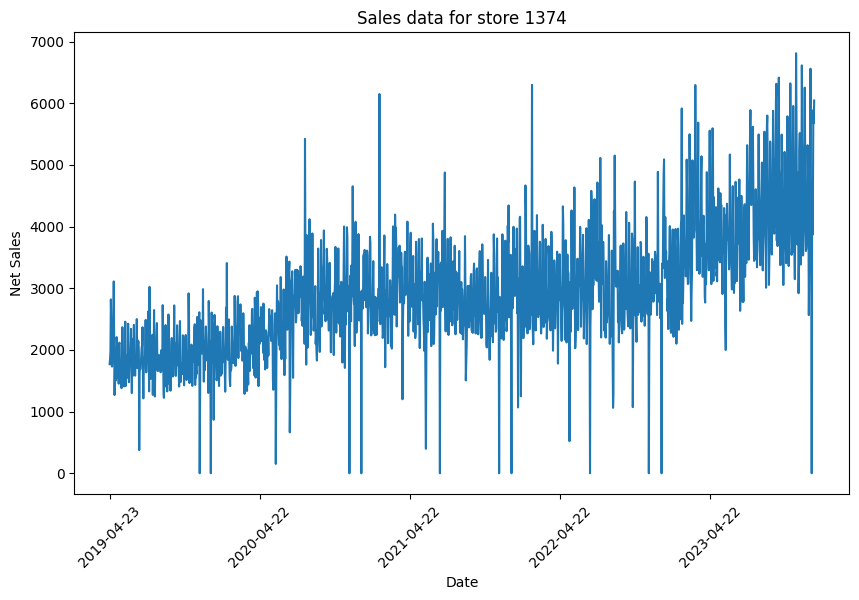

In [8]:
#extract data for store_key 1374
data_1374 = df[df['STORE_KEY'] == 1374]

#find the dma_id and store_name for store_key 1374
store_info = data_1374[['STORE_KEY', 'DMA_ID', 'STATE_NAME']].head(1)
print("\nStore information for store 1374:\n", store_info)

#plot sales data for store 1374
plt.figure(figsize=(10, 6))
plt.plot(data_1374['BUSINESS_DATE'], data_1374['NET_SALES_FINAL_USD_AMOUNT'])
#plot years on x-axis
plt.xticks(np.arange(0, len(data_1374), 365), data_1374['BUSINESS_DATE'][::365], rotation=45)
plt.title("Sales data for store 1374")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


Datatype of entries in BUSINESS_DATE column: <class 'str'>


C:\Users\Abhro\AppData\Local\Temp\ipykernel_28264\3306970638.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data_1374.resample('M', on='BUSINESS_DATE').sum()


Text(0, 0.5, 'Net Sales')

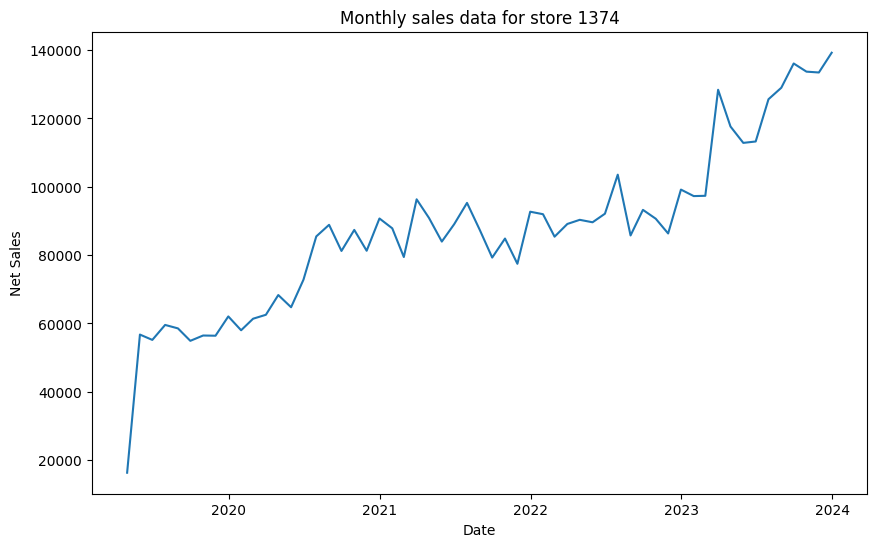

In [9]:
#create a new dataframe with only the required columns
data_1374 = data_1374[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]

#find datatype of entries in BUSINESS_DATE column
print("\nDatatype of entries in BUSINESS_DATE column:", type(data_1374['BUSINESS_DATE'].iloc[0]))

#convert BUSINESS_DATE column to datetime
data_1374['BUSINESS_DATE'] = pd.to_datetime(data_1374['BUSINESS_DATE'])

#sum up the sales data for each month
monthly_sales = data_1374.resample('M', on='BUSINESS_DATE').sum()
monthly_sales.head()

#plot monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Monthly sales data for store 1374")
plt.xlabel("Date")
plt.ylabel("Net Sales")


In [10]:
data_1374 = data_1374[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]
#split into training and testing data 80% training and 20% testing
train_data, test_data = train_test_split(data_1374, test_size=0.2, shuffle=False)
print("\nShape of training data:", train_data.shape)
print("\nShape of testing data:", test_data.shape)



Shape of training data: (1371, 2)

Shape of testing data: (343, 2)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

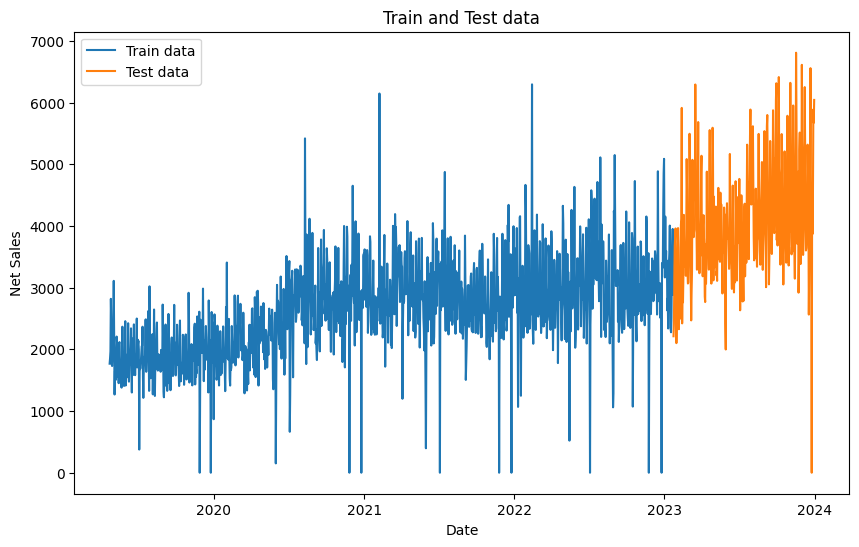

In [12]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(train_data['BUSINESS_DATE'], train_data['NET_SALES_FINAL_USD_AMOUNT'], label='Train data')
plt.plot(test_data['BUSINESS_DATE'], test_data['NET_SALES_FINAL_USD_AMOUNT'], label='Test data')
plt.title("Train and Test data")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.legend()
plt.show()


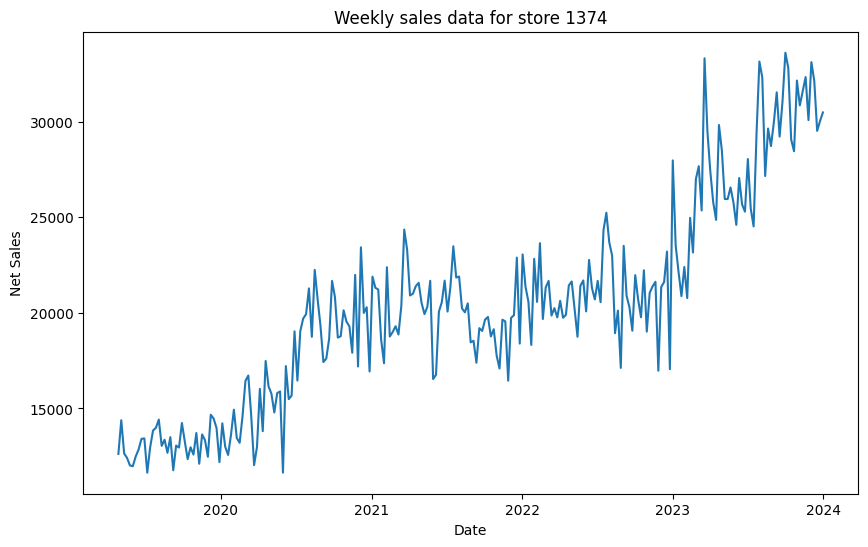

In [13]:
#sum up sales for each week
weekly_sales = data_1374.resample('W', on='BUSINESS_DATE').sum()
weekly_sales.head()

#plot weekly sales data
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Weekly sales data for store 1374")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


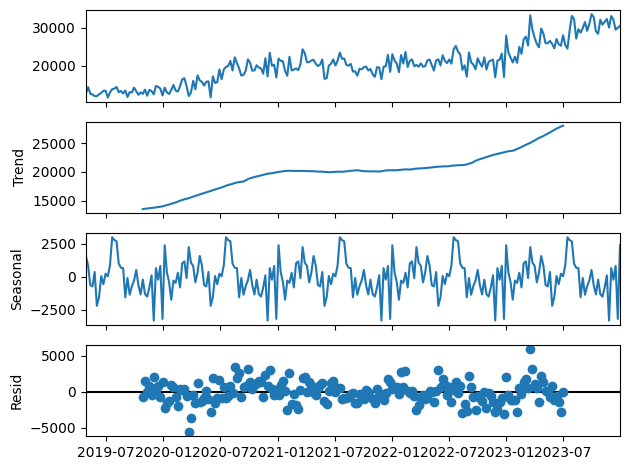

In [14]:
decomposition = seasonal_decompose(weekly_sales, model='additive')
decomposition.plot()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


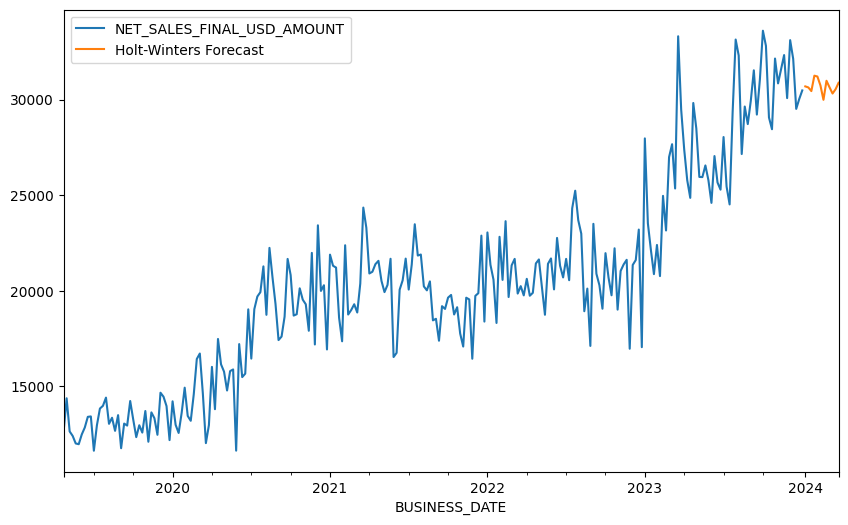

In [15]:
#holt winters model
hw_model = ExponentialSmoothing(weekly_sales, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=12)

weekly_sales.plot(label='Original', figsize=(10, 6))
hw_forecast.plot(label='Holt-Winters Forecast')
plt.legend()
plt.show()

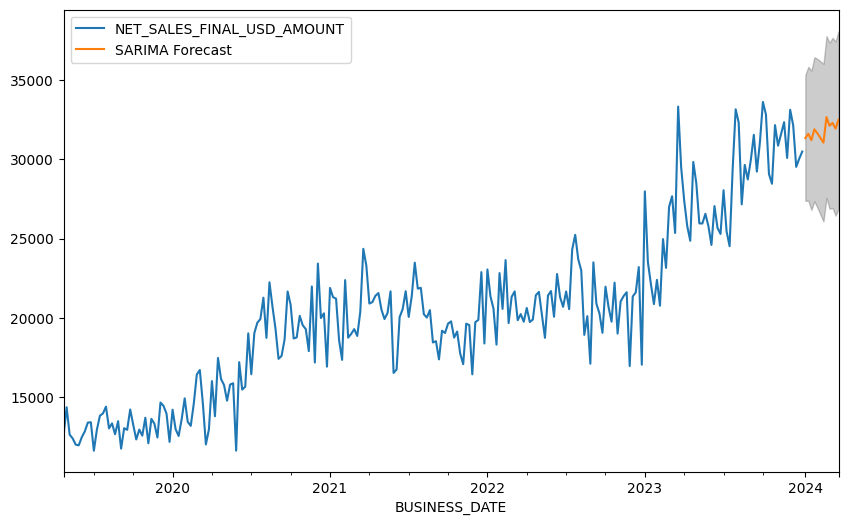

In [17]:
sarima_model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_forecast_ci = sarima_forecast.conf_int()

weekly_sales.plot(label='Original', figsize=(10, 6))
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast')
plt.fill_between(sarima_forecast_ci.index,
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

In [18]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example validation using the last 12 months of data
train_data = weekly_sales[:-12]
test_data = weekly_sales[-12:]

hw_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=12)

sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_forecast_mean = sarima_forecast.predicted_mean

hw_rmse = np.sqrt(mean_squared_error(test_data, hw_forecast))
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast_mean))

hw_mape = mean_absolute_percentage_error(test_data, hw_forecast)
sarima_mape = mean_absolute_percentage_error(test_data, sarima_forecast_mean)

print(f'Holt-Winters RMSE: {hw_rmse}, MAPE: {hw_mape}')
print(f'SARIMA RMSE: {sarima_rmse}, MAPE: {sarima_mape}')

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters RMSE: 1699.6156692272118, MAPE: nan
SARIMA RMSE: 1987.2506858680104, MAPE: nan


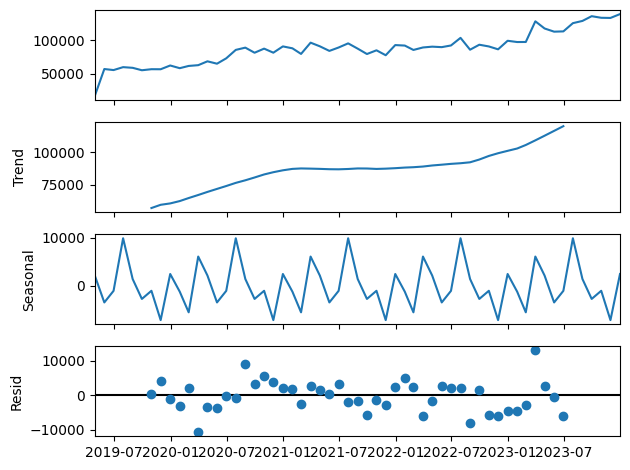

In [19]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


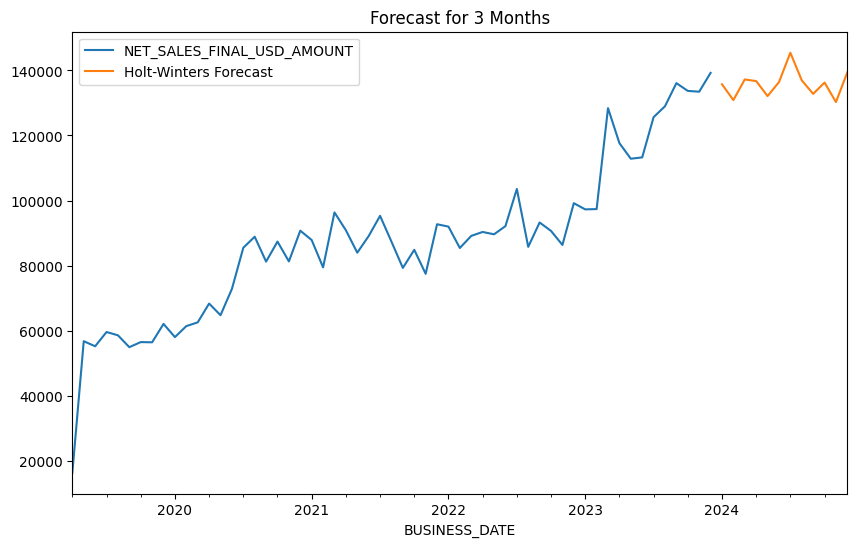

In [45]:
#holt winters model
hw_model = ExponentialSmoothing(monthly_sales, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=12)

monthly_sales.plot(label='Original', figsize=(10, 6))
hw_forecast.plot(label='Holt-Winters Forecast')
plt.title("Forecast for 3 Months")
plt.legend()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


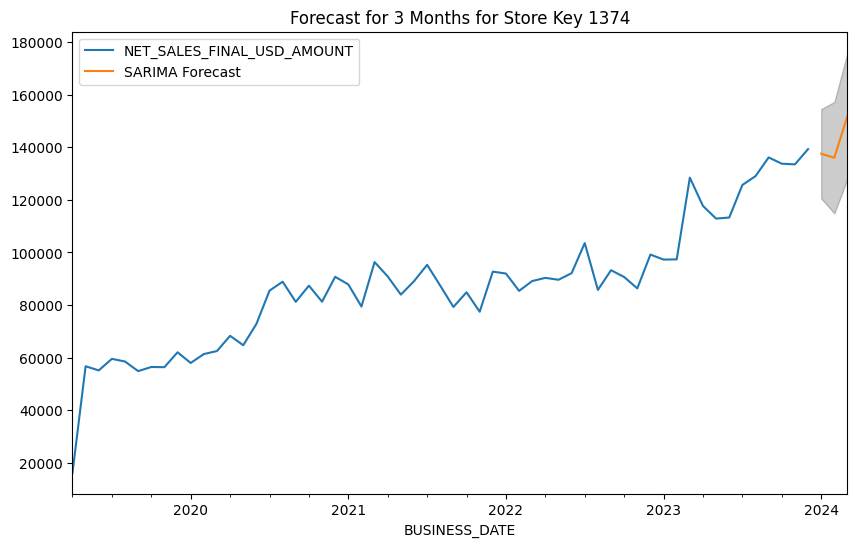

In [53]:
sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=3)
sarima_forecast_ci = sarima_forecast.conf_int()

monthly_sales.plot(label='Original', figsize=(10, 6))
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast')
plt.fill_between(sarima_forecast_ci.index,
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title("Forecast for 3 Months for Store Key 1374")
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


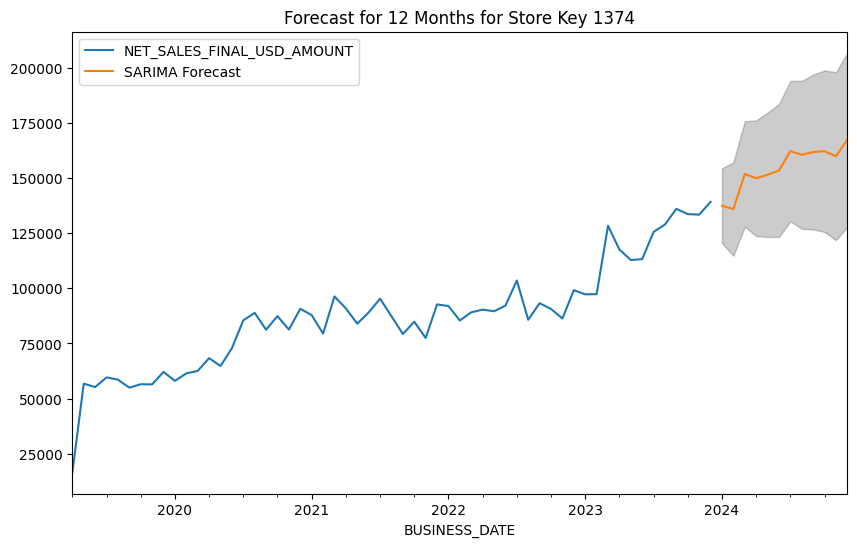

In [54]:
sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_forecast_ci = sarima_forecast.conf_int()

monthly_sales.plot(label='Original', figsize=(10, 6))
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast')
plt.fill_between(sarima_forecast_ci.index,
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title("Forecast for 12 Months for Store Key 1374")
plt.show()

In [37]:
#shape of monthly_sales
print("\nShape of monthly_sales:", monthly_sales.shape)

#split into training and testing data with 12 in test
train_data, test_data = monthly_sales[:-3], monthly_sales[-3:]

#convert to array
train_data = train_data.values
test_data = test_data.values

#convert to 1D array
train_data = np.reshape(train_data, (-1))
test_data = np.reshape(test_data, (-1))

#shape of train_data
print("\nShape of train_data:", train_data.shape)

#shape of test_data
print("\nShape of test_data:", test_data.shape)



Shape of monthly_sales: (57, 1)

Shape of train_data: (54,)

Shape of test_data: (3,)


In [59]:
def calculate_mape(actual, forecast):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) for a sales forecast.
    
    Parameters:
    actual (array-like): The actual sales values
    forecast (array-like): The forecasted sales values
    
    Returns:
    float: The MAPE value
    """
    actual = np.array(actual)
    forecast = np.array(forecast)
    
    # Avoid division by zero
    mask = actual != 0
    actual = actual[mask]
    forecast = forecast[mask]
    
    # Calculate percentage errors
    percentage_errors = np.abs((actual - forecast) / actual)
    
    # Calculate MAPE
    mape = np.mean(percentage_errors) * 100
    
    return mape

In [51]:
def calculate_mae(actual,forecast):
    """
    Calculate the Mean Absolute Error (MAE) for a sales forecast.
    
    Parameters:
    actual (array-like): The actual sales values
    forecast (array-like): The forecasted sales values
    
    Returns:
    float: The MAE value
    """
    actual = np.array(actual)
    forecast = np.array(forecast)
    
    # Calculate absolute errors
    absolute_errors = np.abs(actual - forecast)
    
    # Calculate MAE
    mae = np.mean(absolute_errors)
    
    return mae

In [60]:
forecasting_months = 3

#holt winters model
hw_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=forecasting_months)

#sarima model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=forecasting_months)

#find shape of hw_forecast
print("\nShape of Holt-Winters forecast:", hw_forecast.shape)

#find shape of sarima_forecast
print("\nShape of SARIMA forecast:", sarima_forecast.predicted_mean.shape)



Shape of Holt-Winters forecast: (3,)

Shape of SARIMA forecast: (3,)


d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
print("error for "+ str(forecasting_months) + " months for store key 1374: ") 

#find mape of holt winters model
hw_mape = calculate_mape(test_data, hw_forecast)
print(f'Holt-Winters MAPE: {hw_mape:.2f}%')

#find mape of sarima model
sarima_mape = calculate_mape(test_data, sarima_forecast.predicted_mean)
print(f'SARIMA MAPE: {sarima_mape:.2f}%')

#find mae of holt winters model
hw_mae = calculate_mae(test_data, hw_forecast)
print(f'Holt-Winters MAE: {hw_mae:.2f}')

#find mae of sarima model
sarima_mae = calculate_mae(test_data, sarima_forecast.predicted_mean)
print(f'SARIMA MAE: {sarima_mae:.2f}')




error for 3 months for store key 1374: 
Holt-Winters MAPE: 3.36%
SARIMA MAPE: 1.67%
Holt-Winters MAE: 4543.17
SARIMA MAE: 2251.97


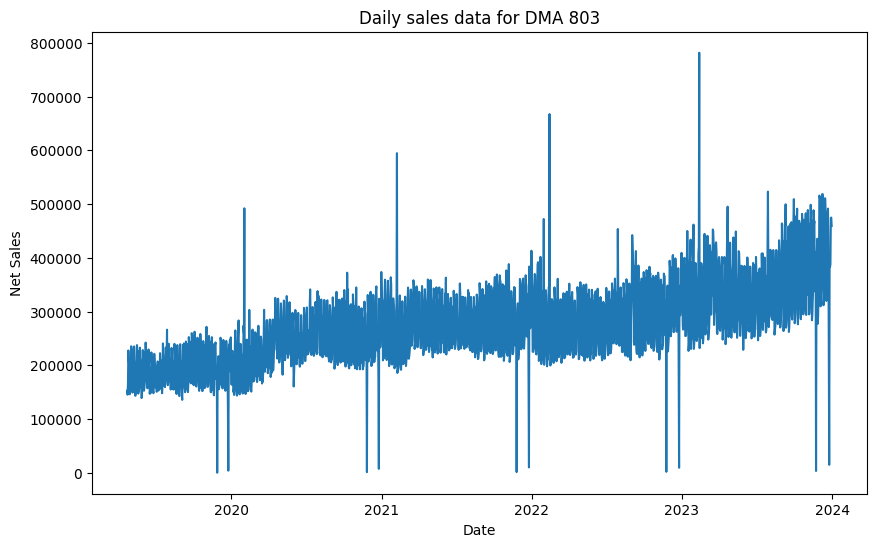

In [63]:
#sum up daily sales for a random dma_id in df
dma_803 = df[df['DMA_ID'] == 803]
dma_803 = dma_803[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]
dma_803.head()

#sort based on date
dma_803 = dma_803.sort_values(by='BUSINESS_DATE')
dma_803 = dma_803.set_index('BUSINESS_DATE')

dma_803.head(10)

#convert to datetime
dma_803.index = pd.to_datetime(dma_803.index)

#sum up sales for each day
daily_sales_803 = dma_803.resample('D').sum()

#plot daily sales data
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_803.index, daily_sales_803['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Daily sales data for DMA 803")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()

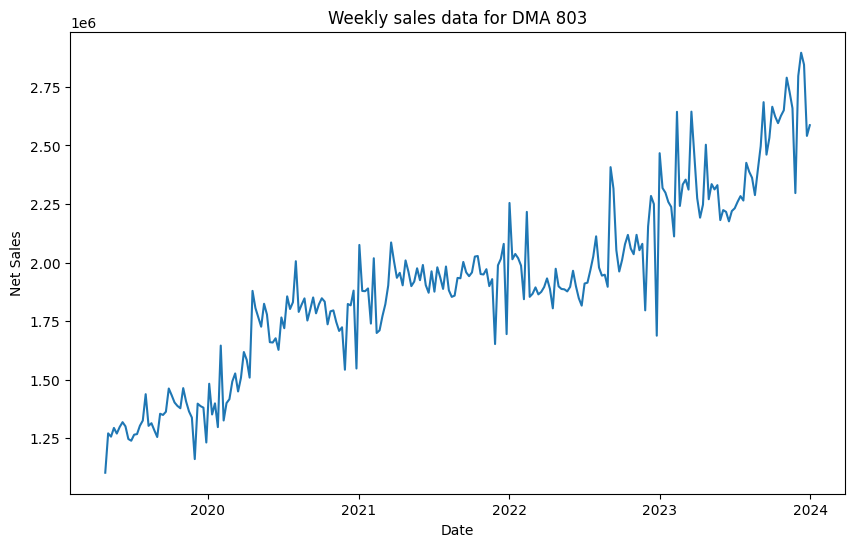

In [71]:
#sum up sales for each week
weekly_sales_803 = dma_803.resample('W').sum()

#plot weekly sales data
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_803.index, weekly_sales_803['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Weekly sales data for DMA 803")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


C:\Users\Abhro\AppData\Local\Temp\ipykernel_28264\1200104712.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_803 = dma_803.resample('M').sum()


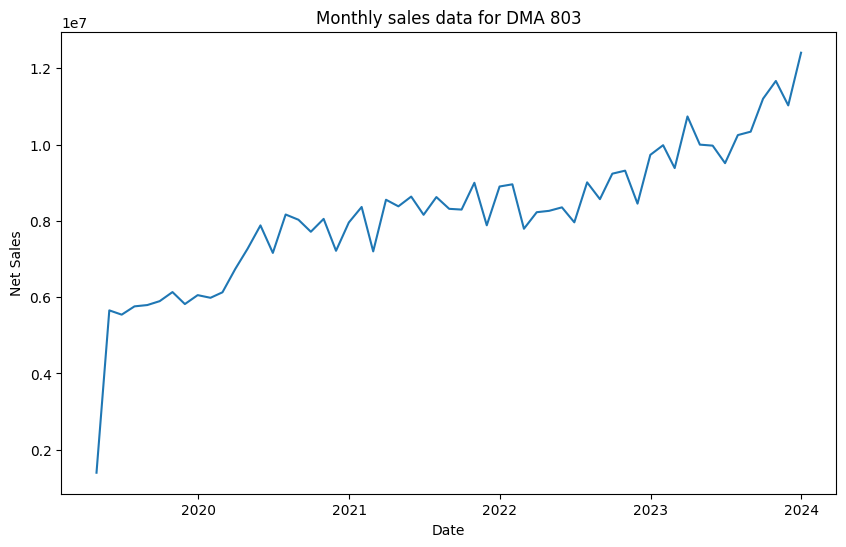

In [69]:
#sum up sales for each month
monthly_sales_803 = dma_803.resample('M').sum()

#plot monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_803.index, monthly_sales_803['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Monthly sales data for DMA 803")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()

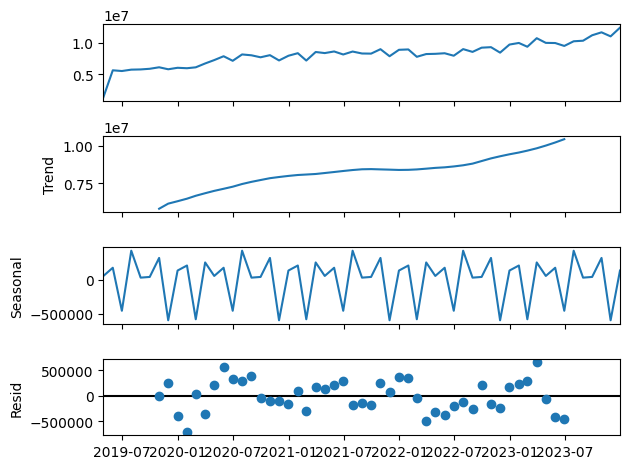

In [117]:
decomposition = seasonal_decompose(monthly_sales_803, model='additive')
decomposition.plot()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


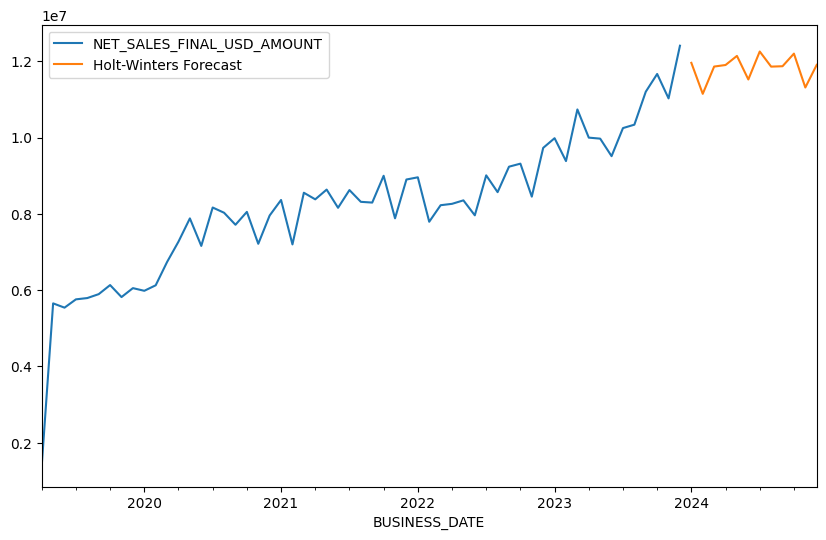

In [66]:
#holt winters model
hw_model = ExponentialSmoothing(monthly_sales_803, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=12)

monthly_sales_803.plot(label='Original', figsize=(10, 6))
hw_forecast.plot(label='Holt-Winters Forecast')
plt.legend()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


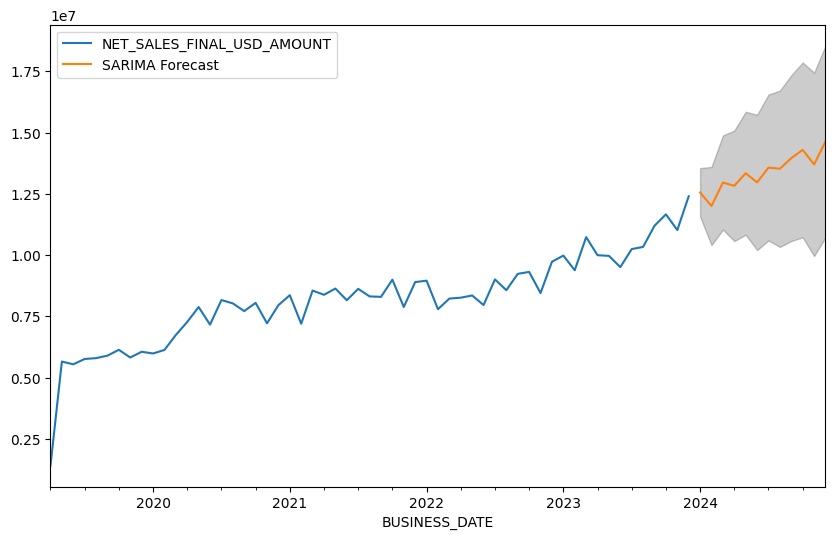

In [67]:
sarima_model = SARIMAX(monthly_sales_803, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=12)
sarima_forecast_ci = sarima_forecast.conf_int()

monthly_sales_803.plot(label='Original', figsize=(10, 6))
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast')
plt.fill_between(sarima_forecast_ci.index,
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

In [68]:
#split into training and testing data with 3 in test
train_data_803, test_data_803 = monthly_sales_803[:-3], monthly_sales_803[-3:]

#convert to array
train_data_803 = train_data_803.values
test_data_803 = test_data_803.values

#convert to 1D array
train_data_803 = np.reshape(train_data_803, (-1))
test_data_803 = np.reshape(test_data_803, (-1))

#shape of train_data_803
print("\nShape of train_data_803:", train_data_803.shape)

#shape of test_data_803
print("\nShape of test_data_803:", test_data_803.shape)


Shape of train_data_803: (54,)

Shape of test_data_803: (3,)


In [72]:
forecasting_months = 3

#holt winters model
hw_model = ExponentialSmoothing(train_data_803, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=forecasting_months)

#sarima model
sarima_model = SARIMAX(train_data_803, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=forecasting_months)

#find shape of hw_forecast
print("\nShape of Holt-Winters forecast:", hw_forecast.shape)

#find shape of sarima_forecast
print("\nShape of SARIMA forecast:", sarima_forecast.predicted_mean.shape)

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Shape of Holt-Winters forecast: (3,)

Shape of SARIMA forecast: (3,)


In [74]:
print("error for "+ str(forecasting_months) + " months for dma id 803: ") 

#find mape of holt winters model
hw_mape = calculate_mape(test_data_803, hw_forecast)
print(f'Holt-Winters MAPE: {hw_mape:.2f}%')

#find mape of sarima model
sarima_mape = calculate_mape(test_data_803, sarima_forecast.predicted_mean)
print(f'SARIMA MAPE: {sarima_mape:.2f}%')

#find mae of holt winters model
hw_mae = calculate_mae(test_data_803, hw_forecast)
print(f'Holt-Winters MAE: {hw_mae:.2f}')

#find mae of sarima model
sarima_mae = calculate_mae(test_data_803, sarima_forecast.predicted_mean)
print(f'SARIMA MAE: {sarima_mae:.2f}')


error for 3 months for dma id 803: 
Holt-Winters MAPE: 9.88%
SARIMA MAPE: 3.66%
Holt-Winters MAE: 1168739.31
SARIMA MAE: 437362.51


In [80]:
#find which state has the most data entries
state_counts = df['STATE_NAME'].value_counts()
print("\nState with most data entries:\n", state_counts.head(1))

print(state_counts)


State with most data entries:
 STATE_NAME
TEXAS    131228
Name: count, dtype: int64
STATE_NAME
TEXAS             131228
CALIFORNIA        126226
FLORIDA            36589
ILLINOIS           34750
OHIO               18112
GEORGIA            17862
ARIZONA            15938
NEW YORK           14731
COLORADO           12285
MISSOURI           11580
NORTH CAROLINA     11538
TENNESSEE          11093
MARYLAND           10220
LOUISIANA           9684
NEW JERSEY          9284
UTAH                8326
MASSACHUSETTS       7157
MISSISSIPPI         6856
MICHIGAN            6762
VIRGINIA            5656
OKLAHOMA            5450
PENNSYLVANIA        5243
NEVADA              5152
ARKANSAS            5142
SOUTH CAROLINA      3748
INDIANA             3497
KENTUCKY            3431
ALASKA              3428
IOWA                3334
WASHINGTON          2982
ALABAMA             2615
CONNECTICUT         2362
WISCONSIN           2281
OREGON              1715
HAWAII              1714
MINNESOTA           1714
NEW 


Shape of daily_sales_all: (1714, 1)


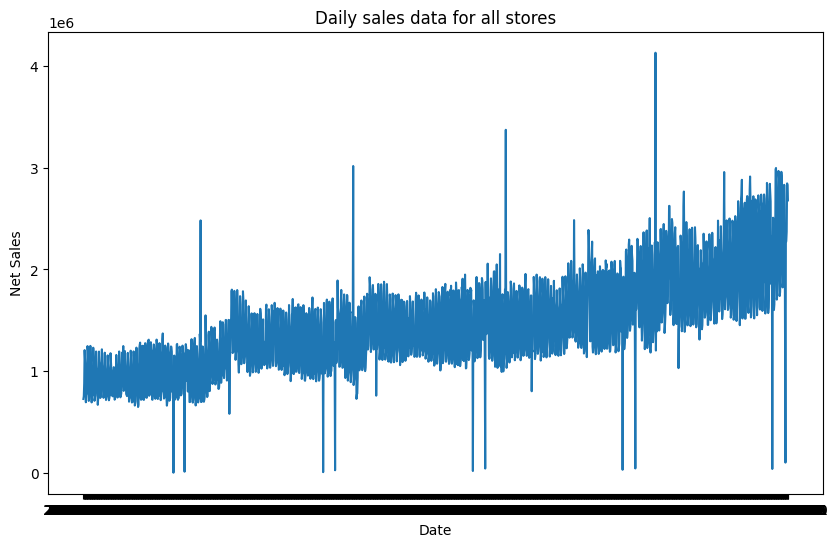

In [82]:
#sum up daily sales for all stores in dataset
daily_sales_all = df[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]
daily_sales_all = daily_sales_all.groupby('BUSINESS_DATE').sum()

#shape of daily_sales_all
print("\nShape of daily_sales_all:", daily_sales_all.shape)

#plot daily sales data
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_all.index, daily_sales_all['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Daily sales data for all stores")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


C:\Users\Abhro\AppData\Local\Temp\ipykernel_28264\286192911.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_all = daily_sales_all.resample('M').sum()


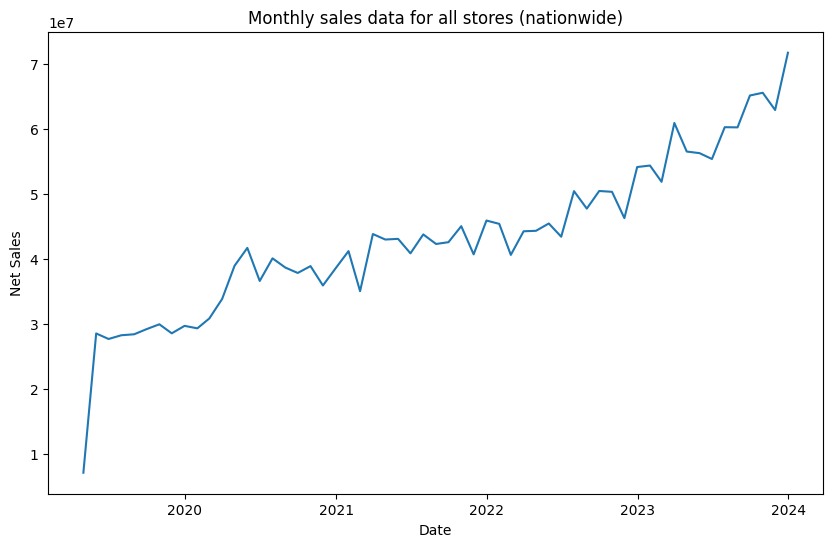

In [85]:
#convert to datetime
daily_sales_all.index = pd.to_datetime(daily_sales_all.index)

#sum up sales for each month
monthly_sales_all = daily_sales_all.resample('M').sum()

#plot monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_all.index, monthly_sales_all['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Monthly sales data for all stores (nationwide)")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


In [90]:
#sum up daily sales for a random dma_id in df
texas_sales = df[df['DMA_ID'] == 803]
texas_sales = texas_sales[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]
texas_sales.head()

#sort based on date
texas_sales = texas_sales.sort_values(by='BUSINESS_DATE')
texas_sales = texas_sales.set_index('BUSINESS_DATE')

texas_sales.head(10)

#convert to datetime
texas_sales.index = pd.to_datetime(dma_803.index)

#sum up sales for each day
daily_sales_texas = dma_803.resample('D').sum()


C:\Users\Abhro\AppData\Local\Temp\ipykernel_28264\4224783017.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_texas = dma_803.resample('M').sum()


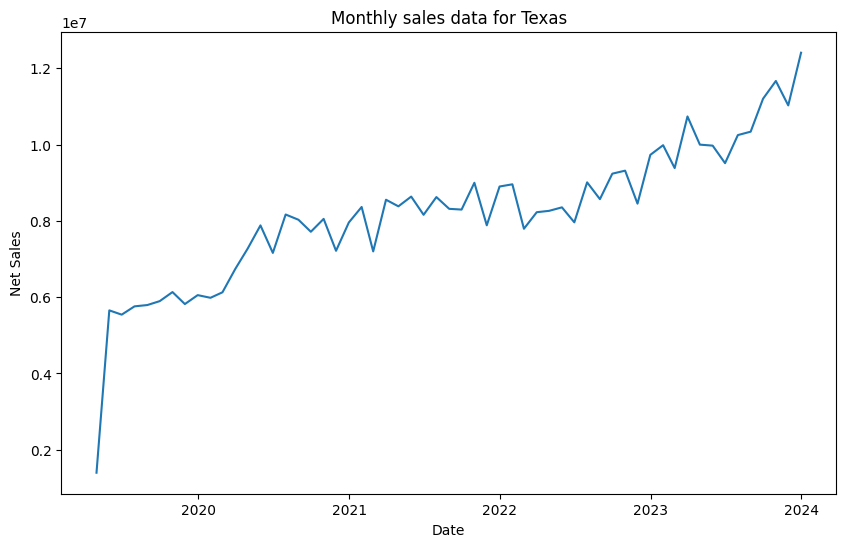

In [91]:
#sum up sales for each month
monthly_sales_texas = dma_803.resample('M').sum()

#plot monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_texas.index, monthly_sales_texas['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Monthly sales data for Texas")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


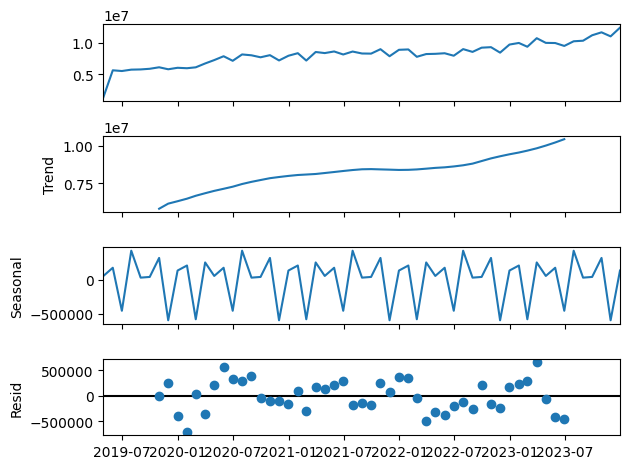

In [92]:
decomposition=seasonal_decompose(monthly_sales_texas, model='additive')
decomposition.plot()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


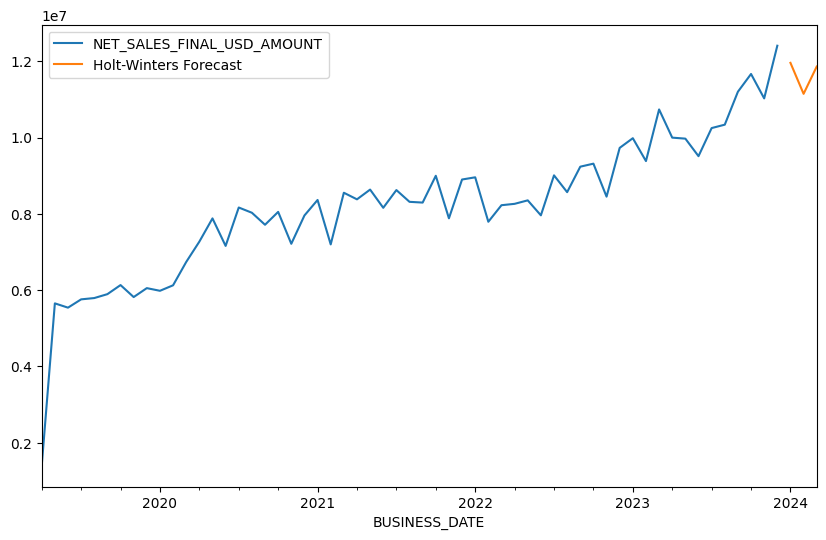

In [94]:
#holt winters model
hw_model = ExponentialSmoothing(monthly_sales_texas, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=3)

monthly_sales_texas.plot(label='Original', figsize=(10, 6))
hw_forecast.plot(label='Holt-Winters Forecast')
plt.legend()
plt.show()

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


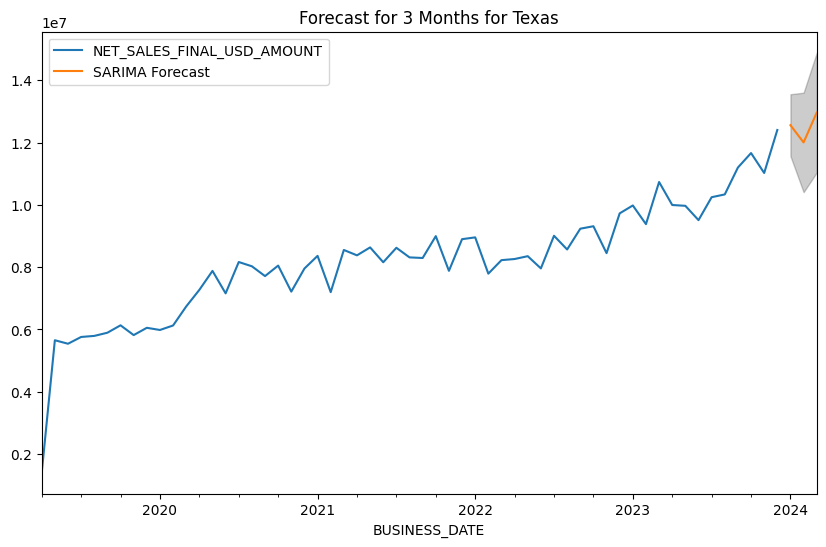

In [99]:
#sarima model
sarima_model = SARIMAX(monthly_sales_texas, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=3)
sarima_forecast_ci = sarima_forecast.conf_int()

monthly_sales_texas.plot(label='Original', figsize=(10, 6))
sarima_forecast.predicted_mean.plot(label='SARIMA Forecast')
plt.fill_between(sarima_forecast_ci.index,
                 sarima_forecast_ci.iloc[:, 0],
                 sarima_forecast_ci.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.title("Forecast for 3 Months for Texas")
plt.show()

In [96]:
#split into training and testing data with 3 in test
train_data_texas, test_data_texas = monthly_sales_texas[:-3], monthly_sales_texas[-3:]

#convert to array
train_data_texas = train_data_texas.values
test_data_texas = test_data_texas.values

#convert to 1D array
train_data_texas = np.reshape(train_data_texas, (-1))
test_data_texas = np.reshape(test_data_texas, (-1))

#shape of train_data_803
print("\nShape of train_data_803:", train_data_texas.shape)

#shape of test_data_803
print("\nShape of test_data_803:", test_data_texas.shape)


Shape of train_data_803: (54,)

Shape of test_data_803: (3,)


In [97]:
forecasting_months = 3

#holt winters model
hw_model = ExponentialSmoothing(train_data_texas, seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(steps=forecasting_months)

#sarima model
sarima_model = SARIMAX(train_data_texas, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.get_forecast(steps=forecasting_months)

#find shape of hw_forecast
print("\nShape of Holt-Winters forecast:", hw_forecast.shape)

#find shape of sarima_forecast
print("\nShape of SARIMA forecast:", sarima_forecast.predicted_mean.shape)

d:\Apps\anaconda3\envs\tsp\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



Shape of Holt-Winters forecast: (3,)

Shape of SARIMA forecast: (3,)


In [98]:
print("error for "+ str(forecasting_months) + " months for dma id 803: ") 

#find mape of holt winters model
hw_mape = calculate_mape(test_data_texas, hw_forecast)
print(f'Holt-Winters MAPE: {hw_mape:.2f}%')

#find mape of sarima model
sarima_mape = calculate_mape(test_data_texas, sarima_forecast.predicted_mean)
print(f'SARIMA MAPE: {sarima_mape:.2f}%')

#find mae of holt winters model
hw_mae = calculate_mae(test_data_texas, hw_forecast)
print(f'Holt-Winters MAE: {hw_mae:.2f}')

#find mae of sarima model
sarima_mae = calculate_mae(test_data_texas, sarima_forecast.predicted_mean)
print(f'SARIMA MAE: {sarima_mae:.2f}')


error for 3 months for dma id 803: 
Holt-Winters MAPE: 9.88%
SARIMA MAPE: 3.66%
Holt-Winters MAE: 1168739.31
SARIMA MAE: 437362.51


In [114]:
#ANALYSING STORES THAT HAVE CLOSED

#find stores that have closed
closed_stores = df[df['STORE_STATUS'] == 'INACTIVE']
closed_stores = closed_stores[['STORE_KEY', 'BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]

#find store_keys of closed stores
closed_store_keys = closed_stores['STORE_KEY'].unique()
print("\nStore keys of closed stores:\n", closed_store_keys)


Store keys of closed stores:
 [ 791  830 1422 1432 1607 1668]


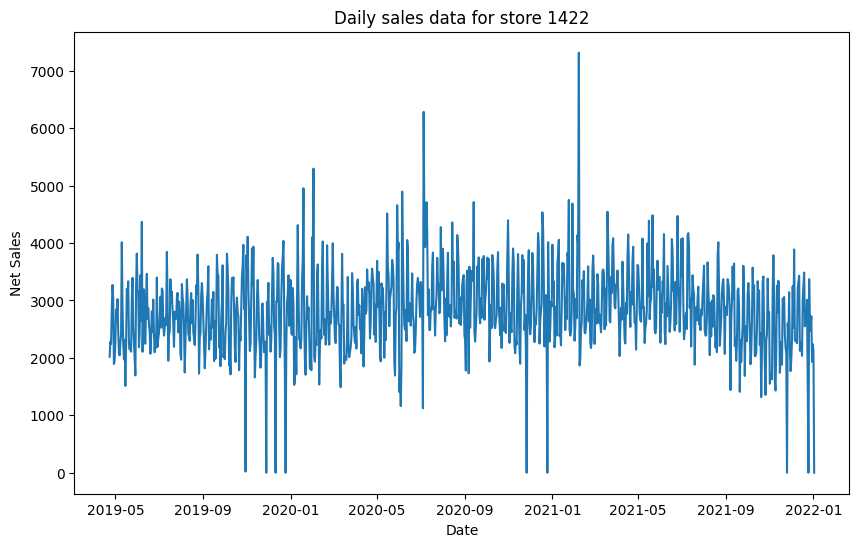

In [115]:
#store_key 1422
store_1422 = closed_stores[closed_stores['STORE_KEY'] == 1422]
store_1422 = store_1422[['BUSINESS_DATE', 'NET_SALES_FINAL_USD_AMOUNT']]
store_1422 = store_1422.set_index('BUSINESS_DATE')

#to datetime
store_1422.index = pd.to_datetime(store_1422.index)

#sum up sales for each day
daily_sales_1422 = store_1422.resample('D').sum()

#plot daily sales data
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_1422.index, daily_sales_1422['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Daily sales data for store 1422")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


C:\Users\Abhro\AppData\Local\Temp\ipykernel_28264\1832743496.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_1422 = store_1422.resample('M').sum()


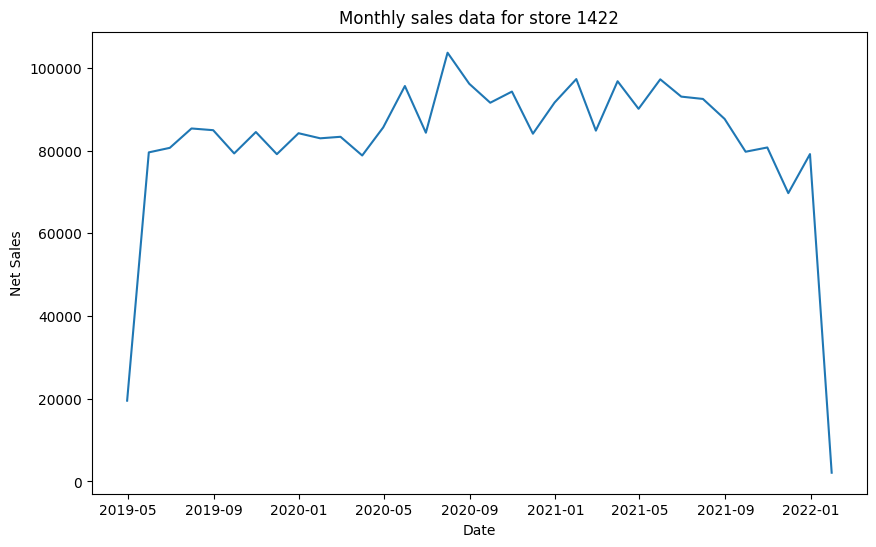

In [116]:
#sum up sales for each month
monthly_sales_1422 = store_1422.resample('M').sum()

#plot monthly sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_1422.index, monthly_sales_1422['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Monthly sales data for store 1422")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()


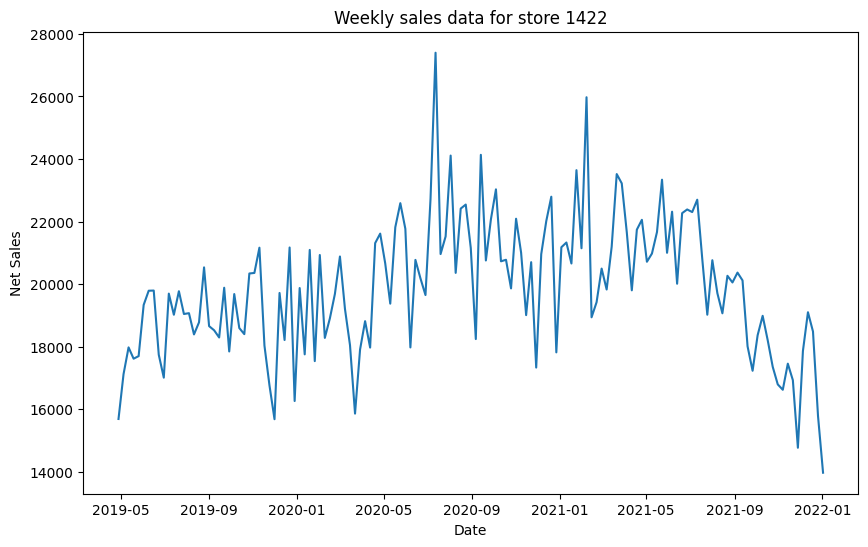

In [117]:
#sum up sales for each week
weekly_sales_1422 = store_1422.resample('W').sum()

#plot weekly sales data
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales_1422.index, weekly_sales_1422['NET_SALES_FINAL_USD_AMOUNT'])
plt.title("Weekly sales data for store 1422")
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.show()